# Chapter 2 - Flows on the Line

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils.solvers import FirstOrderDiffEqn
from utils.solvers.firstorder import num_sol_runge_kutta,num_sol_euler

## Flows

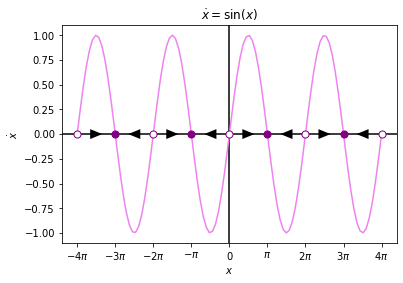

In [2]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
x_dot = np.sin(x)

plt.plot(x, x_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")
plt.title("$\dot{x} = \sin(x)$")
plt.xticks(np.linspace(-4 * np.pi, 4 * np.pi, 9), labels=["$-4\pi$", "$-3\pi$", "$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$", "$3\pi$", "$4\pi$"])

# Arrow heads
for x in np.linspace(-3.5 * np.pi, 3.5 * np.pi, 8):
  direction = 1 if np.sin(x) > 0 else -1
  plt.arrow(x - 0.5 * direction, 0, 0.001 * direction, 0, head_width=0.1, head_length=1, edgecolor='None', facecolor='black')

# Dots
plt.scatter(np.linspace(-4 * np.pi, 4 * np.pi, 5), np.zeros((5, )), s=50, c='white', edgecolors='purple', zorder=10)
plt.scatter(np.linspace(-3 * np.pi, 3 * np.pi, 4), np.zeros((4, )), s=50, c='purple', zorder=10)

plt.show()

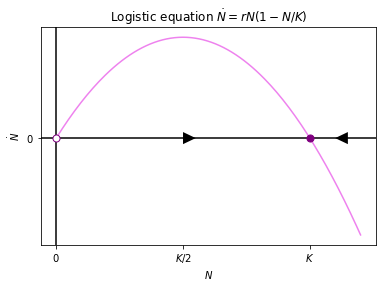

In [3]:
K = 100
r = 1
n = np.linspace(0, K * 1.2, 150)
n_dot = n * r * (1 - n / K)

plt.plot(n, n_dot, color='violet')

plt.axhline(color="black", zorder=-1)
plt.axvline(color="black", zorder=-1)
plt.ylabel("$\dot{N}$")
plt.xlabel("$N$")
plt.title("Logistic equation $\dot{N} = rN (1 - N/K)$")
plt.xticks([0, K/2, K], ["$0$", "$K/2$", "$K$"])
plt.yticks([0], ["$0$"])

plt.scatter([0], [0], s=50, c='white', edgecolor='purple', zorder=10)
plt.scatter([K], [0], s=50, c='purple', zorder=10)
plt.arrow(K/2, 0, 0.001, 0, head_width=3, head_length=5, edgecolor='None', facecolor='black')
plt.arrow(K * 1.15, 0, -0.001, 0, head_width=3, head_length=5, edgecolor='None', facecolor='black')

plt.show()

## Numerical Solutions

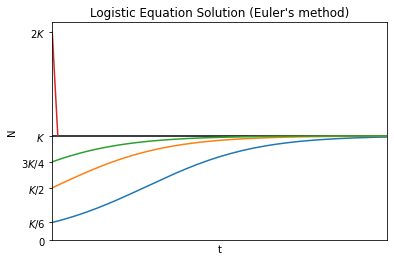

In [4]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_euler(logistic_fn, K/6)
t2, N2 = num_sol_euler(logistic_fn, K/2)
t3, N3 = num_sol_euler(logistic_fn, 3*K/4)
t4, N4 = num_sol_euler(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Euler's method)")

plt.show()

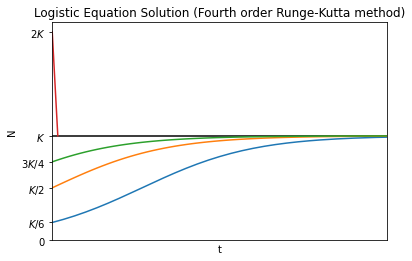

In [5]:
K = 100
r = 1
logistic_fn: FirstOrderDiffEqn = lambda n: n * r * (1 - n / K)

t1, N1 = num_sol_runge_kutta(logistic_fn, K/6)
t2, N2 = num_sol_runge_kutta(logistic_fn, K/2)
t3, N3 = num_sol_runge_kutta(logistic_fn, 3*K/4)
t4, N4 = num_sol_runge_kutta(logistic_fn, 2*K)

plt.plot(t1, N1, t2, N2, t3, N3, t4, N4)
plt.xlim(0, 6)
plt.axhline(100, color='black', zorder=-100)
plt.xlabel("t")
plt.xticks([])
plt.ylabel("N")
plt.yticks([0, K/6, K/2, 3 * K/4, K, 2 * K], ["$0$", "$K/6$", "$K/2$", "$3K/4$", "$K$", "$2K$"])
plt.title("Logistic Equation Solution (Fourth order Runge-Kutta method)")

plt.show()